In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
feedback = pd.read_csv(r'..\preprocessed\feedback_preprocessed.csv')
behaviour = pd.read_csv(r'..\preprocessed\behaviour_2023_preprocessed.csv')

In [58]:
feedback.head()

,Unnamed: 0,UID,nClick,nOpen,nSend
0,0,15A56DE8-6D68-4966-820D-3893C7F0183F,0,3,0
1,1,0DBDACA7-ED99-447A-AF41-0032C63BA003,0,6,0
2,2,0355FE1A-045F-4F17-A4BB-18F176B98E9A,0,1,0
3,3,E8587D0E-4F32-4BD3-9889-281A5CA2EFEB,0,2,0
4,4,3B01032D-60A7-40A9-9BAD-377D07CD8D31,0,2,0


In [39]:
behaviour.head(2)

,Unnamed: 0,UID,OKVED,BeginDate,EndDate,nCount,Amount,Volume,Weight,UnitTypeCategory,BeginQuarter,EndQuarter,ActivityArea,Service,Support,TransportationType,ResponseDays
0,0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-07-26,2023-07-26,1,400.0,0.08,4.0,2,3,3,0.0,NaN,NaN,0.0,NaN
1,1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,467306.0,2023-02-15,2023-02-15,1,400.0,0.30,4.0,2,1,1,1.0,NaN,NaN,0.0,NaN


In [59]:
okved_to_categorical = dict()
for i, okved in enumerate(behaviour['OKVED'].unique()):
    okved_to_categorical[okved] = i
okved_to_categorical

{467306.0: 0,
 469000.0: 1,
 266001.0: 2,
 141301.0: 3,
 580000.0: 4,
 291005.0: 5,
 465100.0: 6,
 467300.0: 7,
 860000.0: 8,
 464602.0: 9,
 461900.0: 10,
 310000.0: 11,
 931100.0: 12,
 nan: 13,
 453100.0: 14,
 105200.0: 15,
 170200.0: 16,
 180100.0: 17,
 466905.0: 18,
 310900.0: 19,
 259900.0: 20,
 682002.0: 21,
 101100.0: 22,
 842100.0: 23,
 453101.0: 24,
 432900.0: 25,
 257300.0: 26,
 559000.0: 27,
 236300.0: 28,
 412000.0: 29,
 351200.0: 30,
 460300.0: 31,
 466909.0: 32,
 490400.0: 33,
 466900.0: 34,
 256100.0: 35,
 382100.0: 36,
 222100.0: 37,
 467101.0: 38,
 467502.0: 39,
 683200.0: 40,
 869004.0: 41,
 110700.0: 42,
 460900.0: 43,
 256200.0: 44,
 467100.0: 45,
 561000.0: 46,
 11100.0: 47,
 452000.0: 48,
 471901.0: 49,
 464904.0: 50,
 464300.0: 51,
 139200.0: 52,
 466100.0: 53,
 310100.0: 54,
 466902.0: 55,
 466600.0: 56,
 741000.0: 57,
 861000.0: 58,
 466300.0: 59,
 439907.0: 60,
 467402.0: 61,
 475205.0: 62,
 522900.0: 63,
 470100.0: 64,
 711101.0: 65,
 467200.0: 66,
 181200.0: 

In [60]:
okved_to_categorical = dict()
for i, okved in enumerate(behaviour['OKVED'].unique()):
    okved_to_categorical[okved] = i

holidays = {'01-01', '01-02', '01-03', '01-04', '01-05', '01-06', 
            '01-07', '01-08', '02-23', '03-08', '05-01',
            '05-08', '05-09', '06-12', '11-06', '12-31'}

behaviour['OKVED'] = behaviour['OKVED'].map(okved_to_categorical)
behaviour['OKVED'] = behaviour['OKVED'].map(okved_to_categorical)

behaviour['OKVED'] = behaviour['OKVED'].map(okved_to_categorical).astype("category")
behaviour['UnitTypeCategory'] = behaviour['UnitTypeCategory'].astype("category")
behaviour['BeginQuarter'] = behaviour['BeginQuarter'].astype("category")
behaviour['EndQuarter'] = behaviour['EndQuarter'].astype("category")
behaviour['ActivityArea'] = behaviour['ActivityArea'].map(lambda x: 0 if pd.isnull(x) else x+1).astype("category")
behaviour['Service'] = behaviour['Service'].map(lambda x: 0 if pd.isnull(x) else x+1).astype("category") #Nan это категория 0, остальные категории смещаются на + 1
behaviour['Support'] = behaviour['Support'].map(lambda x: 0 if pd.isnull(x) else x+1).astype("category") #Nan это категория 0, остальные категории смещаются на + 1
behaviour['TransportationType'] = behaviour['TransportationType'].map(lambda x: 0 if pd.isnull(x) else x+1).astype("category") #Nan это категория 0, остальные категории смещаются на + 1
behaviour['ResponseDays'] = behaviour['ResponseDays'].map(lambda x: 0 if pd.isnull(x) else x)  #заменяем Nan на 0

behaviour['BeginMonth'] = pd.to_datetime(behaviour['BeginDate']).dt.month.astype("category")
behaviour['EndMonth']  = pd.to_datetime(behaviour['EndDate']).dt.month.astype("category")
 
behaviour['IsHoliday'] = behaviour.BeginDate.str.slice(5).map(lambda x: 1 if x in holidays else 0).astype("category")
behaviour['IsWeekend'] = pd.to_datetime(behaviour.BeginDate).dt.day_of_week.map(lambda x: 1 if x == 6 else 0).astype("category")

#behaviour['Volume'] = behaviour.Volume.map(lambda x: 1 if x in holidays else 0)
#behaviour['Weight'] = behaviour.Weight.map(lambda x: 1 if x in holidays else 0)
behaviour['ActivityArea'] = behaviour.ActivityArea.map(lambda x: 1 if x in holidays else 0)
behaviour = behaviour.fillna(0)

behaviour = behaviour.drop(['BeginDate', 'EndDate', 'BeginQuarter', 'EndQuarter', 'Unnamed: 0'], axis = 1)

In [62]:
behaviour.head(2)

,Unnamed: 0,UID,OKVED,nCount,Amount,Volume,Weight,UnitTypeCategory,ActivityArea,Service,Support,TransportationType,ResponseDays,BeginMonth,EndMonth,IsHoliday,IsWeekend
0,0,F1C6F397-07A0-4783-8093-523BA2B5F1C2,0,1,400.0,0.08,4.0,2,0.0,0.0,0.0,1.0,0.0,7,7,0,0
1,1,F1C6F397-07A0-4783-8093-523BA2B5F1C2,0,1,400.0,0.30,4.0,2,0.0,0.0,0.0,1.0,0.0,2,2,0,0


In [61]:
categorical_columns = ['OKVED', 'UnitTypeCategory', 'ActivityArea', 'Service', 'Support', 'TransportationType', 'BeginMonth', 'EndMonth', 'IsHoliday', 'IsWeekend']
for column_name in categorical_columns:
    print(behaviour[column_name].value_counts())

13    66859
Name: OKVED, dtype: int64
2    48293
0    12744
1     5822
Name: UnitTypeCategory, dtype: int64
0    66859
Name: ActivityArea, dtype: int64
0.0     41696
3.0      4420
2.0      4369
1.0      3895
4.0      2569
5.0      2035
7.0      1644
9.0      1417
6.0      1339
10.0      972
8.0       704
11.0      380
14.0      312
12.0      187
17.0      128
15.0      111
18.0       96
13.0       88
19.0       86
21.0       71
24.0       46
25.0       40
35.0       38
33.0       34
47.0       30
16.0       24
23.0       22
27.0       13
22.0       11
30.0        9
32.0        8
26.0        7
38.0        7
46.0        6
34.0        6
31.0        6
28.0        6
20.0        5
39.0        4
36.0        3
41.0        3
43.0        3
45.0        3
37.0        2
29.0        1
40.0        1
42.0        1
44.0        1
Name: Service, dtype: int64
0.0    63129
2.0     2105
1.0     1625
Name: Support, dtype: int64
0.0    28893
2.0    16506
4.0    16506
1.0     2477
3.0     2477
Name: Transporta

### Делаем таргет

array([[<AxesSubplot: title={'center': 'nClick'}>,
        <AxesSubplot: title={'center': 'nOpen'}>],
       [<AxesSubplot: title={'center': 'nSend'}>, <AxesSubplot: >]],
      dtype=object)

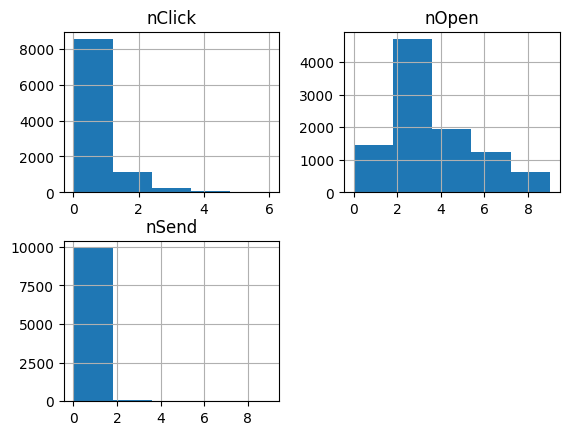

In [64]:
feedback.loc[:, 'nClick':'nSend'].hist(bins = 5)

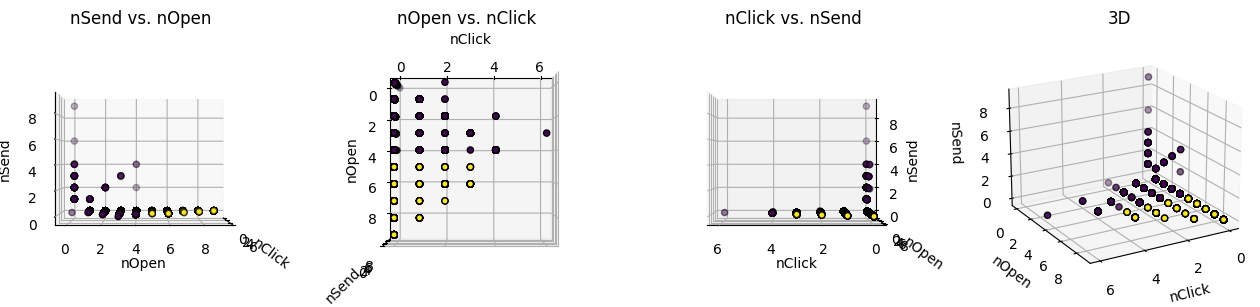

In [19]:
from sklearn.cluster import KMeans
cluster_model =  KMeans(n_clusters=2)
fig = plt.figure(figsize=(16, 16))
title = "nSend vs. nOpen"
ax = fig.add_subplot(1, 4, 1, projection="3d", elev=0, azim=0)
cluster_model.fit(feedback.loc[:, 'nClick':'nSend'].values)
labels = cluster_model.labels_
ax.scatter(feedback.iloc[:, 2], feedback.iloc[:, 3], feedback.iloc[:, 4], c=labels, edgecolor="k")
ax.set_xlabel("nClick")
ax.set_ylabel("nOpen")
ax.set_zlabel("nSend")
ax.set_title(title)

title = "nOpen vs. nClick"
ax = fig.add_subplot(1, 4, 2, projection="3d", elev=270, azim=270)
#cluster_model.fit(feedback.loc[:, 'nClick':'nSend'].values)
#labels = cluster_model.labels_
ax.scatter(feedback.iloc[:, 2], feedback.iloc[:, 3], feedback.iloc[:, 4], c=labels, edgecolor="k")
ax.set_xlabel("nClick")
ax.set_ylabel("nOpen")
ax.set_zlabel("nSend")
ax.set_title(title)

title = "nClick vs. nSend"
ax = fig.add_subplot(1, 4, 3, projection="3d", elev=0, azim=90)
#cluster_model.fit(feedback.loc[:, 'nClick':'nSend'].values)
#labels = cluster_model.labels_
ax.scatter(feedback.iloc[:, 2], feedback.iloc[:, 3], feedback.iloc[:, 4], c=labels, edgecolor="k")
ax.set_xlabel("nClick")
ax.set_ylabel("nOpen")
ax.set_zlabel("nSend")
ax.set_title(title)


title = "3D"
ax = fig.add_subplot(1, 4, 4, projection="3d", elev=20, azim=60)
#cluster_model.fit(feedback.loc[:, 'nClick':'nSend'].values)
#labels = cluster_model.labels_
ax.scatter(feedback.iloc[:, 2], feedback.iloc[:, 3], feedback.iloc[:, 4], c=labels, edgecolor="k")
ax.set_xlabel("nClick")
ax.set_ylabel("nOpen")
ax.set_zlabel("nSend")
ax.set_title(title)


plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [62]:
feedback['percent_nClick'] = round(feedback['nClick']/ feedback.loc[:, 'nClick':'nSend'].sum(axis = 1), 2)

In [63]:
final_df = behaviour.merge(feedback.loc[:, ['UID','percent_nClick']], how = 'left', on='UID')
final_df = final_df.drop('UID', axis = 1)

In [64]:
categorical_columns
numeric_columns = ['nCount', 'Amount', 'Volume', 'Weight', 'ResponseDays']
final_df.loc[:, numeric_columns] = (final_df.loc[:, numeric_columns] - final_df.loc[:, numeric_columns].mean())/final_df.loc[:, numeric_columns].std() 
final_df.head(3)

,OKVED,nCount,Amount,Volume,Weight,UnitTypeCategory,ActivityArea,Service,Support,TransportationType,ResponseDays,BeginMonth,EndMonth,IsHoliday,IsWeekend,percent_nClick
0,13,-0.181507,-0.148894,-0.279923,-0.292516,2,0,0.0,0.0,1.0,-0.095249,7,7,0,0,0.0
1,13,-0.181507,-0.148894,-0.077765,-0.292516,2,0,0.0,0.0,1.0,-0.095249,2,2,0,0,0.0
2,13,-0.156236,-0.148894,-0.178844,-0.292516,2,0,0.0,0.0,2.0,-0.095249,2,7,0,0,0.0


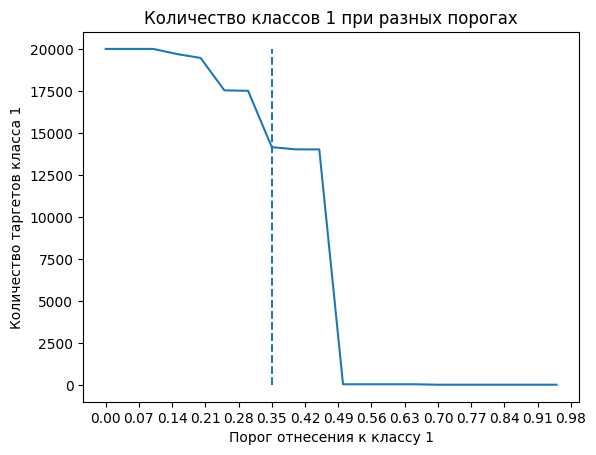

In [65]:
ones, thresh_lst = [], []
for thresh in np.arange(0, 1, 0.05):
    bin_values = final_df['percent_nClick'].map(lambda x: 1 if x>thresh else 0).value_counts()
    ones.append(bin_values.get(1))
    thresh_lst.append(thresh)
plt.plot(thresh_lst, ones)
plt.xlabel("Порог отнесения к классу 1")  # add X-axis label
plt.ylabel("Количество таргетов класса 1")  # add Y-axis label
plt.title("Количество классов 1 при разных порогах")  # add title
plt.xticks(np.arange(0, 1, 0.07))
plt.vlines(ymin = 0, ymax = 20000, x = 0.35, linestyles='dashed')
plt.show()

In [66]:
final_df['BinNclick'] = final_df['percent_nClick'].map(lambda x: 1 if x>0.35 else 0)

In [67]:
final_df

,OKVED,nCount,Amount,Volume,Weight,UnitTypeCategory,ActivityArea,Service,Support,TransportationType,ResponseDays,BeginMonth,EndMonth,IsHoliday,IsWeekend,percent_nClick,BinNclick
0,13,-0.181507,-0.148894,-0.279923,-0.292516,2,0,0.0,0.0,1.0,-0.095249,7,7,0,0,0.0,0
1,13,-0.181507,-0.148894,-0.077765,-0.292516,2,0,0.0,0.0,1.0,-0.095249,2,2,0,0,0.0,0
2,13,-0.156236,-0.148894,-0.178844,-0.292516,2,0,0.0,0.0,2.0,-0.095249,2,7,0,0,0.0,0
3,13,-0.181507,-0.148894,-0.279923,-0.292516,2,0,0.0,0.0,3.0,-0.095249,7,7,0,0,0.0,0
4,13,-0.181507,-0.148894,-0.077765,-0.292516,2,0,0.0,0.0,3.0,-0.095249,2,2,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66854,13,-0.181507,-0.149992,-0.353435,-0.307505,1,0,35.0,0.0,0.0,-0.095249,8,8,0,0,0.0,0
66855,13,-0.156236,0.333426,1.769225,0.621814,1,0,0.0,0.0,1.0,-0.095249,7,10,0,0,0.0,0
66856,13,-0.156236,0.333426,1.769225,0.621814,1,0,0.0,0.0,2.0,-0.095249,7,10,0,0,0.0,0
66857,13,-0.156236,0.333426,1.769225,0.621814,1,0,0.0,0.0,3.0,-0.095249,7,10,0,0,0.0,0


In [33]:
!pip3.10 install statsmodels

   ---------------------------------------- 9.8/9.8 MB 1.1 MB/s eta 0:00:00
   -------------------------------------- 233.9/233.9 kB 796.1 kB/s eta 0:00:00


DEPRECATION: pytorch-lightning 1.8.2 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
final_df.ActivityArea.describe()

count    66859.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: ActivityArea, dtype: float64

C:\Users\Mikhail\AppData\Local\Temp\ipykernel_4012\824951410.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_df.corr()


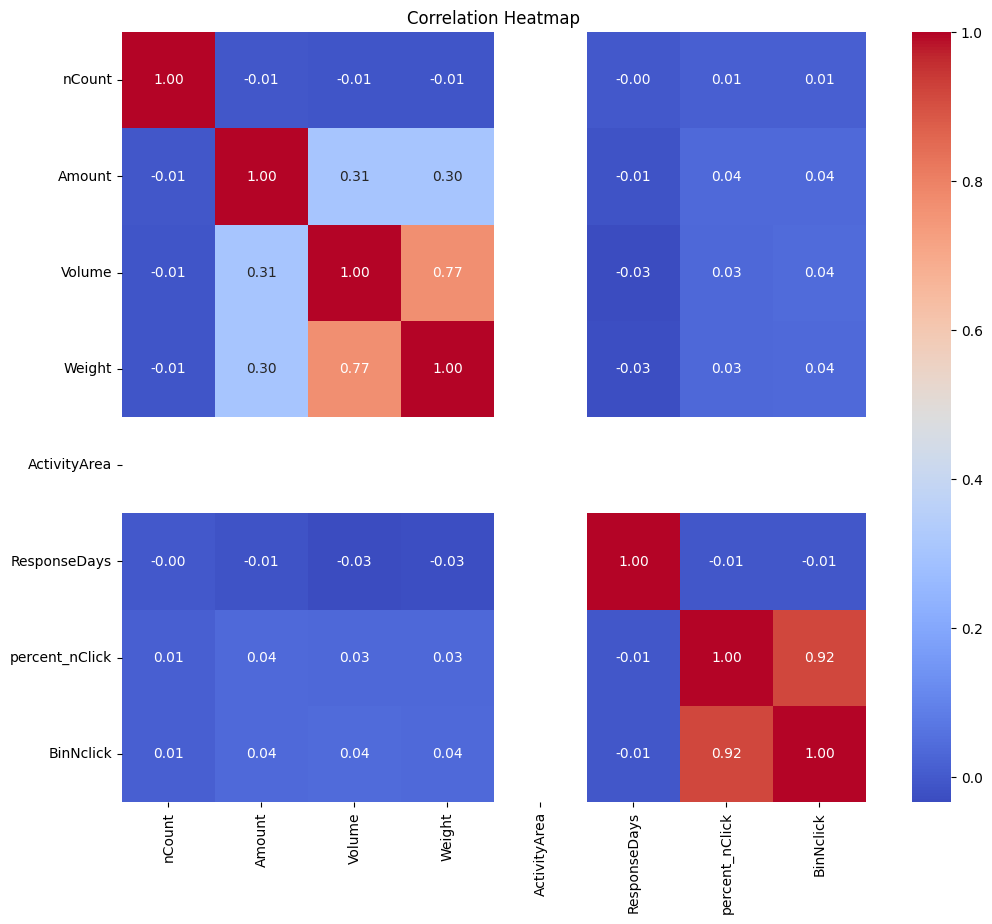

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляции между признаками
correlation_matrix = final_df.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [34]:
import statsmodels.api as sm

In [71]:
X, y = final_df.drop('Weight', axis = 1).loc[:, 'OKVED':'IsWeekend'],   final_df.loc[:, 'BinNclick']  

# Инициализация логистической регрессии
logit_model = sm.Logit(y, X)

# Подгонка модели
result = logit_model.fit()

# Вывод результатов
print(result.summary())

# Отбор признаков с использованием критерия Акаике
selected_features = X.columns[np.where(result.pvalues < 0.05)[0]]
print("Selected Features:", selected_features)

Optimization terminated successfully.
         Current function value: 0.503457
         Iterations 6


LinAlgError: Singular matrix

In [115]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='lbfgs', random_state=0)
# fit the model
logreg.fit(final_df.loc[:,'OKVED':'IsWeekend'], final_df.loc[:,'BinNclick'])

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values